# Part 1 - Dataset Generation
### You don't need to use your Colab GPU compute time on this notebook! You will probably need it when you train your neural network.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

from skimage.io import imread, imshow, imsave
from skimage import transform, img_as_ubyte

import pandas as pd

In [ ]:
### You can mount your drive in this cell in one of two ways ###

# Uncomment the following #
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the "Files" explorer on the left hand side
# There should be four icons: Upload, Reload, Folder with Drive Icon, and an Eye
# Clicking on the Folder withe the Drive Icon, will mount your Google Drive to this session

Mounted at /content/drive


We now load in our images. Note that we are only going to have you do **three** class classification, between left, right, and stop. There is **no** forward like there was in Lab 4.

(480, 640, 3)


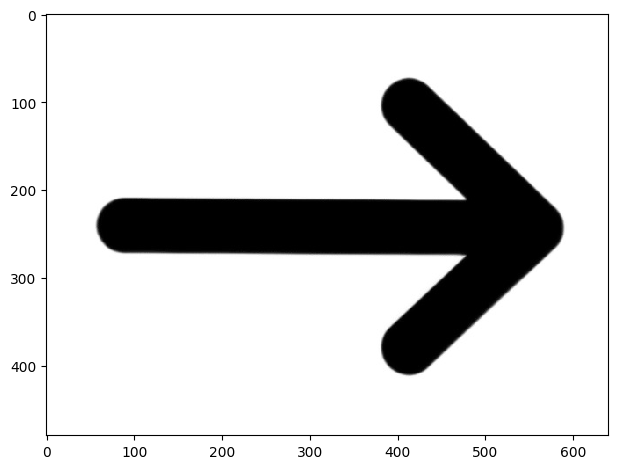

In [ ]:
dir = '' #'drive/My Drive/Extracurriculars/IEEE/PocketRacers/'
stop = imread(dir + 'stop.jpg')
left = imread(dir + 'left.jpg')
right = imread(dir + 'right.jpg')
imshow(right)

# Note that the shape of the image will match what our Pi's camera reads in #
print(left.shape)

Your task here will be to write a function that applies a homography matrix (affine transform, in this case) to an image. The function will accept a bunch of parameters about the individual operations that compose an affine transformation, and it should return the changed image.

In [ ]:
def apply_H(image, scalex, scaley, alpha, xshear, yshear, translate_x, translate_y):
    alpha_rad = np.deg2rad(alpha)
    H = np.array([
        [scalex * np.cos(alpha_rad) + xshear * np.sin(alpha_rad), yshear * np.sin(alpha_rad) - scaley * np.sin(alpha_rad), translate_x],
        [-xshear * np.cos(alpha_rad) + scalex * np.sin(alpha_rad), scaley * np.cos(alpha_rad) + yshear * np.cos(alpha_rad), translate_y],
        [0, 0, 1]
    ])
    # Some of the parameters in these skimage functions, especially transform.warp, might be useful to understand #
    # But it suffices to know that the following code just applies H to the image #
    tform = transform.ProjectiveTransform(H)

    return transform.warp(image, tform.inverse)

Naturally, you need to test the function you wrote. This is probably the most difficult part, as you will need to determine a range that the affine transformation parameters can take without invalidating the class of the image. For example, you wouldn't want to rotate right by more than 90 degrees, otherwise it might actually be left.

**I would strongly advise** testing the function with a single set of parameters first to understand how exactly the transformation is applied. As a hint, if you see a blank image, it may be because your warped image is not in the range of coordinates in a (640, 480) size image.

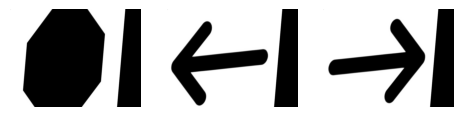

In [ ]:
# Here is some boilerplate code for plotting a list of transforms.
list = [stop, left, right]

scalex = 0.8
scaley = 0.8
alpha = 20
xshear = 0.4
yshear = 0.5
translate_x = 0.2
translate_y = 0.3

# figsize controls the overall figure's height and width in inches
fig = plt.figure(figsize=(30,30))
for i, im in enumerate(list):
    # note that the first two parameters, control how many subplots
    # in the overall figure
    im = apply_H(im, scalex, scaley, alpha, xshear, yshear, translate_x, translate_y)
    plt.subplot(15, 15, i + 1)
    plt.imshow(im)
    plt.axis('off')

Once you have determined a valid range of parameters, you should begin generating your dataset. You should be able to apply homographies in such a way that the class of the image is not invalidated.

Remember Lab 5? I strongly advise using a similar mentality, where you keep a csv file with the class index and the file names of a generated image. This way, you don't have to start from scratch (skimage images are just saved as numpy arrays). You may import whatever packages you wish to make this easier. There are infinitely many ways to do this, but be sure that you have a training, validation, and testing dataset that you will know how to load into Tensorflow (or PyTorch for that matter).

In [ ]:
def generate_homography_parameters():
  scalex = np.random.uniform(0.8, 1.2)
  scaley = np.random.uniform(0.8, 1.2)
  alpha = np.random.uniform(-15, 15)
  xshear = np.random.uniform(-0.2, 0.2)
  yshear = np.random.uniform(-0.2, 0.2)
  translate_x = np.random.uniform(-30, 30)
  translate_y = np.random.uniform(-30, 30)

  parameters = [scalex, scaley, alpha, xshear, yshear, translate_x, translate_y]
  return parameters

In [ ]:
stop = imread(dir + 'stop.jpg')
left = imread(dir + 'left.jpg')
right = imread(dir + 'right.jpg')

transformed_file_paths = []
class_indices = []

data = {}

df = pd.DataFrame(data)

samples_per_class = 500
# stop
for i in range(samples_per_class):
  parameters = generate_homography_parameters()
  scalex = parameters[0]
  scaley = parameters[1]
  alpha = parameters[2]
  xshear = parameters[3]
  yshear = parameters[4]
  translate_x = parameters[5]
  translate_y = parameters[6]
  transformed_image = apply_H(stop, scalex, scaley, alpha, xshear, yshear, translate_x, translate_y)
  transformed_file_path = dir + 'transformed_images/' + f'stop{i}.jpg'
  imsave(transformed_file_path, img_as_ubyte(transformed_image))
  transformed_file_paths.append(transformed_file_path)
  class_indices.append(0)

# left
for j in range(samples_per_class):
  parameters = generate_homography_parameters()
  scalex = parameters[0]
  scaley = parameters[1]
  alpha = parameters[2]
  xshear = parameters[3]
  yshear = parameters[4]
  translate_x = parameters[5]
  translate_y = parameters[6]
  transformed_image = apply_H(left, scalex, scaley, alpha, xshear, yshear, translate_x, translate_y)
  transformed_file_path = dir + 'transformed_images/' + f'left{i}.jpg'
  imsave(transformed_file_path, img_as_ubyte(transformed_image))
  transformed_file_paths.append(transformed_file_path)
  class_indices.append(1)

# right
for k in range(samples_per_class):
  parameters = generate_homography_parameters()
  scalex = parameters[0]
  scaley = parameters[1]
  alpha = parameters[2]
  xshear = parameters[3]
  yshear = parameters[4]
  translate_x = parameters[5]
  translate_y = parameters[6]
  transformed_image = apply_H(right, scalex, scaley, alpha, xshear, yshear, translate_x, translate_y)
  transformed_file_path = dir + 'transformed_images/' + f'right{i}.jpg'
  imsave(transformed_file_path, img_as_ubyte(transformed_image))
  transformed_file_paths.append(transformed_file_path)
  class_indices.append(2)

df['transformed_file_name'] = transformed_file_paths
df['class_indices'] = class_indices
df.to_csv(dir + 'dataset.csv', index=False)

Once you have your datasets, feel free to begin a new notebook and create a CNN. Don't forget to switch over to GPU time once you are training your network. Feel free to refer back to your work in Lab 5! We would actually strongly recommend reviewing the cards part of Lab 5, as it is not fundamentally different from what we are doing here.